In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import ttest_rel, ttest_ind
import numpy as np
import seaborn as sns
import os

%matplotlib inline

_degrees = u'\u00B0'
_um = u'\u00B5m'

axis_label_size = 15
tick_label_size = 15
title_size = 28
subtitle_size = 30
star_size = 14
figure_size = [4, 4]


def set_font_sizes(title_size=28, subtitle_size=14, axis_label_size=12, tick_label_size=12):
    """control all font sizes in the notebook"""
    plt.rcParams.update({'axes.titlesize': subtitle_size});
    plt.rcParams.update({'axes.labelsize': axis_label_size});
    plt.rcParams.update({'xtick.labelsize': tick_label_size});
    plt.rcParams.update({'ytick.labelsize': tick_label_size});
    plt.rcParams.update({'figure.titlesize': title_size});
    
set_font_sizes(title_size=title_size, 
               subtitle_size=subtitle_size,
               axis_label_size=axis_label_size,
               tick_label_size=tick_label_size);

In [32]:
def p_to_stars(p):
    """map p-values to stars to display on graphs"""
    if p > 0.05:
        return 'n.s.';
    elif p > 0.01:
        return '*';
    elif p > 0.001:
        return '**';
    else:
        return '***';

In [39]:
def my_boxplot(df, ylabel, column_names=['Control', 'Experimental'], scatter=True, ttest=False, star_size=12, figure_size=[4,8]):
    fig, ax = plt.subplots(1,1,figsize=figure_size);
    sns.set(style="ticks", color_codes=True);
    sns.boxplot(data=df, palette=['#89bedc','#fda057'], showfliers=False, whis=np.inf)
    if scatter:
        sns.swarmplot(data=df, color=".25")
    ax.set_ylabel(ylabel);
    ax.grid(False)
 
    # FOR NOW, ONLY T-TEST BETWEEN TWO CONDITIONS
    if ttest and len(column_names) > 1:
        p = ttest_ind(df[column_names[0]].dropna(), df[column_names[1]].dropna()).pvalue;
        print(p)
        start_ylims = ax.get_ylim();
        start_plot_height = ax.get_ylim()[1] - ax.get_ylim()[0];
        height_per_comparison = 0.1 * (start_ylims[1] - start_ylims[0]);
        ax.set_ylim(start_ylims[0], start_ylims[1] +  height_per_comparison);
        lx = ax.get_xticks()[0];
        rx = ax.get_xticks()[1];
        mid = lx/2 + rx/2;
        lry = start_ylims[1] + 0.25 * height_per_comparison;
        h = height_per_comparison/4;
 
        barx = [lx, lx, rx, rx];
        bary = [(lry-h), lry, lry, (lry-h)];
        ax.plot(barx, bary, c='black');
        ax.text(mid, lry + h/2, p_to_stars(p), horizontalalignment='center', fontsize=star_size); 
        
    plt.tight_layout();
 
    return fig, ax;

0.024335613903093276


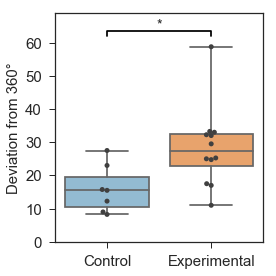

In [42]:
in_path = "/Users/cib/Desktop/DATA/deviation from 360.csv"
# in_path = "C://Users//dougk//Desktop/experiment.csv"
df = pd.read_csv(in_path)
fig, ax = my_boxplot(df, 
                     "Deviation from 360" + _degrees, 
                     column_names=['Control', 'Experimental'], 
                     scatter=True, 
                     ttest=True, 
                     figure_size=figure_size, 
                     star_size=star_size);
# ax.set_ylim([0, 10]);
ax.set_ylim([0, 69]);

set_font_sizes(title_size=title_size, 
           subtitle_size=subtitle_size,
           axis_label_size=axis_label_size,
           tick_label_size=tick_label_size);

out_path = os.path.join(os.path.dirname(in_path), os.path.splitext(os.path.basename(in_path))[0]);
fig.savefig(out_path+'.png', dpi=600)

with PdfPages(out_path+'.pdf') as pdf:
    pdf.savefig(fig);


0.03180707653051328


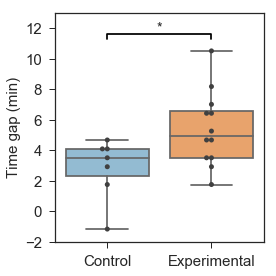

In [43]:
in_path = "/Users/cib/Desktop/DATA/time difference in descent.csv"
df4 = pd.read_csv(in_path)
fig, ax = my_boxplot(df4, 
                     "Time gap (min)", 
                     column_names=['Control', 'Experimental'], 
                     scatter=True, 
                     ttest=True, 
                     figure_size=figure_size, 
                     star_size=star_size);
ax.set_yticks([y for y in range(-2,13,2)]);
ax.set_ylim([-2, 13]);

set_font_sizes(title_size=title_size, 
           subtitle_size=subtitle_size,
           axis_label_size=axis_label_size,
           tick_label_size=tick_label_size);

out_path = os.path.join(os.path.dirname(in_path), os.path.splitext(os.path.basename(in_path))[0]);
fig.savefig(out_path+'.png', dpi=600);

with PdfPages(out_path+'.pdf') as pdf:
    pdf.savefig(fig);


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1842: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1843: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


0.0004325796585266516


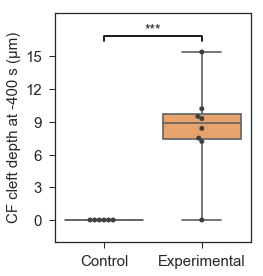

In [44]:
in_path = "/Users/cib/Desktop/DATA/distance initiating cell.csv"
df2 = pd.read_csv(in_path)
fig, ax = my_boxplot(df2, 
                     "CF cleft depth at -400 s (" + _um + ")", 
                     column_names=['Control', 'Experimental'], 
                     scatter=True, 
                     ttest=True, 
                     figure_size=figure_size, 
                     star_size=star_size);
ax.set_yticks([y for y in range(-3,18,3)]);
ax.set_ylim([-2, 19]);

set_font_sizes(title_size=title_size, 
           subtitle_size=subtitle_size,
           axis_label_size=axis_label_size,
           tick_label_size=tick_label_size);

out_path = os.path.join(os.path.dirname(in_path), os.path.splitext(os.path.basename(in_path))[0]);
fig.savefig(out_path+'.png', dpi=600);

with PdfPages(out_path+'.pdf') as pdf:
    pdf.savefig(fig);


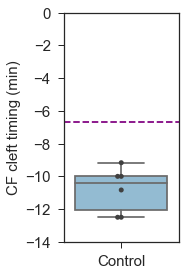

In [46]:
in_path = "/Users/cib/Desktop/DATA/timing CF.csv"
df3 = pd.read_csv(in_path)
fig, ax = my_boxplot(df3,
                     "CF cleft timing (min)", 
                     column_names=['Control'], 
                     scatter=True, 
                     ttest=False, 
                     figure_size=[3,4]);
ax.set_ylim([-14, 0]);
plt.axhline(y=-6.67, xmin=0, xmax=1, linestyle = '--', Color = 'purple');

set_font_sizes(title_size=title_size, 
           subtitle_size=subtitle_size,
           axis_label_size=axis_label_size,
           tick_label_size=tick_label_size);

out_path = os.path.join(os.path.dirname(in_path), os.path.splitext(os.path.basename(in_path))[0]);
fig.savefig(out_path+'.png', dpi=600)
# nb for this graph the figure size is set as [3,4]
with PdfPages(out_path+'.pdf') as pdf:
    pdf.savefig(fig);
